# CALIDAD DE DATOS

## IMPORTACIÓN DE PAQUETES

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

## IMPORTAR LOS DATOS

In [51]:
df = pd.read_excel('../../02_Datos/03_Trabajo/trabajo.xlsx')
df

,Unnamed: 0,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2012.92,32.00,84.88,10,24.98,121.54,37.90
1,1,2012.92,19.50,306.59,9,24.98,121.54,42.20
2,2,2013.58,13.30,561.98,5,24.99,121.54,47.30
3,3,2013.50,13.30,561.98,5,24.99,121.54,54.80
4,7,2013.42,20.30,287.60,6,24.98,121.54,46.70
...,...,...,...,...,...,...,...,...
285,408,2013.42,18.50,2175.74,3,24.96,121.51,28.10
286,409,2013.00,13.70,4082.01,0,24.94,121.50,15.40
287,411,2013.25,18.80,390.97,7,24.98,121.54,40.60
288,412,2013.00,8.10,104.81,5,24.97,121.54,52.50


## CORRECCIÓN DE NOMBRES DE VARIABLES

In [52]:
df.rename(columns= {'X1 transaction date':'date',
           'X2 house age':'age',
           'X3 distance to the nearest MRT station':'distance_station',
           'X4 number of convenience stores':'stores',
           'X5 latitude':'latitude',
           'X6 longitude':'longitude',
           'Y house price of unit area':'price'},inplace=True)

In [53]:
#Eliminamos la columnas Unnamed: 0

df.drop(columns='Unnamed: 0', inplace=True)

## VISIÓN GENERAL

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              290 non-null    float64
 1   age               290 non-null    float64
 2   distance_station  290 non-null    float64
 3   stores            290 non-null    int64  
 4   latitude          290 non-null    float64
 5   longitude         290 non-null    float64
 6   price             290 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.0 KB


## TIPOS DE DATOS

In [55]:
df.dtypes

date                float64
age                 float64
distance_station    float64
stores                int64
latitude            float64
longitude           float64
price               float64
dtype: object

## VALORES ÚNICOS

In [56]:
df.nunique()

date                 12
age                 188
distance_station    202
stores               11
latitude            184
longitude           188
price               214
dtype: int64

## DUPLICADOS

In [57]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

Vamos a separar el año y mes

In [58]:
# Separar los datos en tres columnas
df[['year', 'mes']] = df['date'].apply(lambda x: pd.Series(str(x).split('.')))
df['year'] = df.year.astype('int64')
df['mes'] = df['mes'].apply(lambda x: str(x)[0] + '.' + str(x)[1:])
df['mes'] = df.mes.astype('float64')
df['mes'] = df.mes.apply(lambda x: int((x / 0.833) +1))
df['mes'] = df.mes.astype('int64')

#Eliminamos columna date
df.drop(columns='date',inplace= True)

### Numéricas

In [59]:
num = df.select_dtypes(include='number').copy()
num.head()

,age,distance_station,stores,latitude,longitude,price,year,mes
0,32.00,84.88,10,24.98,121.54,37.90,2012,12
1,19.50,306.59,9,24.98,121.54,42.20,2012,12
2,13.30,561.98,5,24.99,121.54,47.30,2013,8
3,13.30,561.98,5,24.99,121.54,54.80,2013,7
4,20.30,287.60,6,24.98,121.54,46.70,2013,6


## GESTIÓN DE NUMÉRICAS

### ESTADÍSTICOS Y GRÁFICOS DE LAS VARIABLES NUMÉRICAS

In [60]:
def estadisticos_num(df_num):
    #Describe Numéricas
    estadisticos = df_num.describe().T
    return estadisticos

estadisticos_num(num)

,count,mean,std,min,25%,50%,75%,max
age,290.00,17.76,10.95,0.00,11.10,16.20,25.82,42.70
distance_station,290.00,1136.00,1289.49,49.66,289.32,492.94,1562.22,6396.28
stores,290.00,3.96,2.95,0.00,1.00,4.00,6.00,10.00
latitude,290.00,24.97,0.01,24.93,24.96,24.97,24.98,25.01
longitude,290.00,121.53,0.02,121.48,121.53,121.54,121.54,121.57
price,290.00,37.95,14.09,12.20,27.00,38.35,46.18,117.50
year,290.00,2012.72,0.45,2012.00,2012.00,2013.00,2013.00,2013.00
mes,290.00,6.21,3.49,1.00,3.00,6.00,9.00,12.00


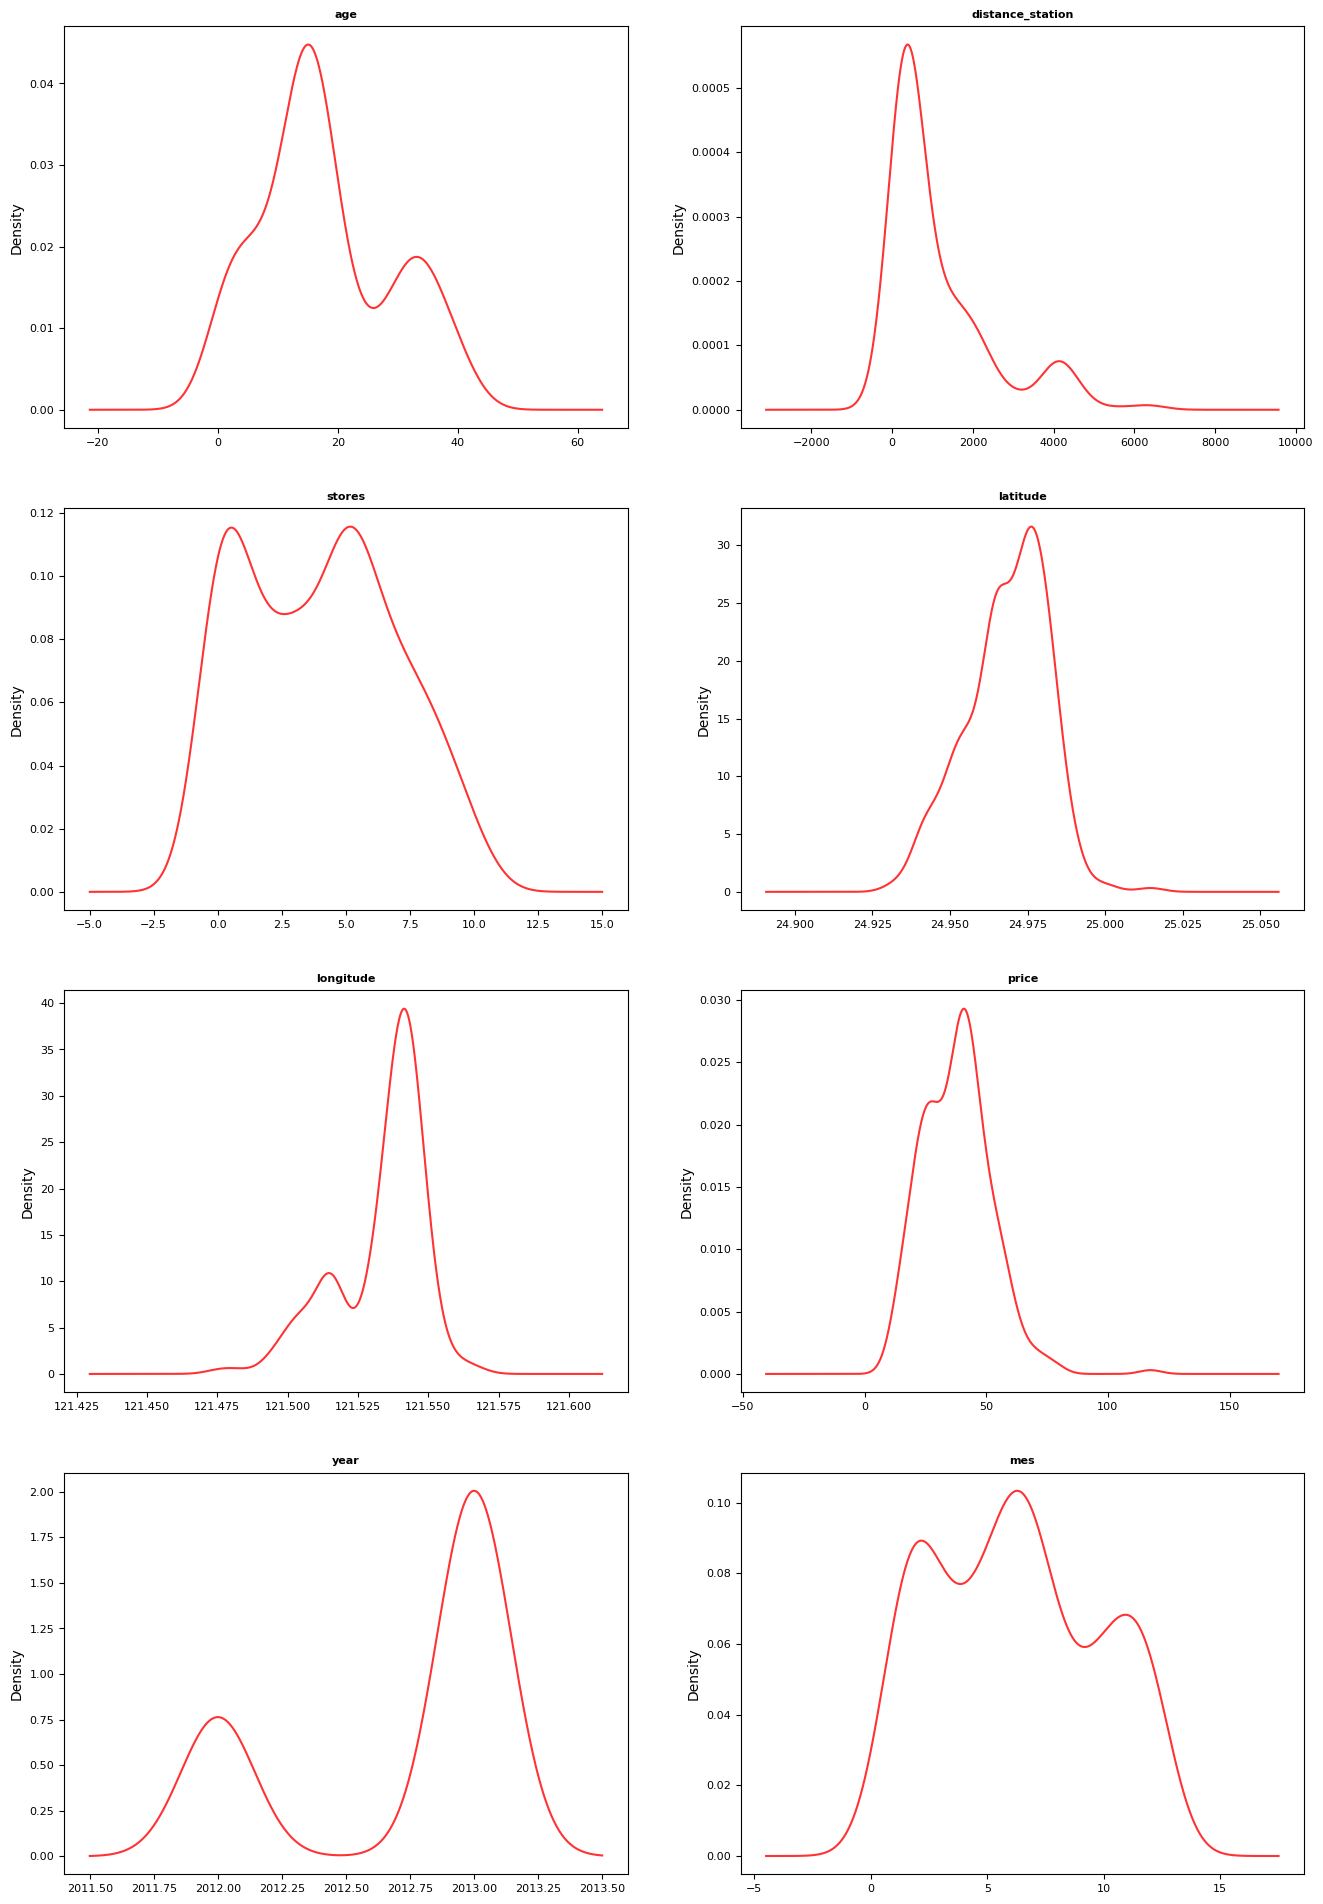

In [61]:
def grafico_eda_continuas(df_cont):
    from math import ceil
    #Calculamos el número de filas que necesitamos
    filas = ceil(df_cont.shape[1]/2)

    #definimos el gráfico
    f, ax = plt.subplots(nrows= filas, ncols= 2, figsize = (16,filas *6))

    #aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2

    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 8, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 8)


grafico_eda_continuas(num)

### GESTIÓN DE NULOS

In [62]:
num.isna().sum()

age                 0
distance_station    0
stores              0
latitude            0
longitude           0
price               0
year                0
mes                 0
dtype: int64

### GESTIÓN ATÍPICOS

#### Identificación

###### Definir el número de desviaciones típicas

In [63]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [64]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [65]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [66]:
var_atipicos_dt = ['age', 'distance_station', 'stores', 'latitude', 'longitude', 'price']

###### Aplicar

In [67]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


age:

Series([], Name: age, dtype: int64)

distance_station:

6396.28    1
6306.15    1
Name: distance_station, dtype: int64

stores:

Series([], Name: stores, dtype: int64)

latitude:

Series([], Name: latitude, dtype: int64)

longitude:

Series([], Name: longitude, dtype: int64)

price:

117.50    1
Name: price, dtype: int64


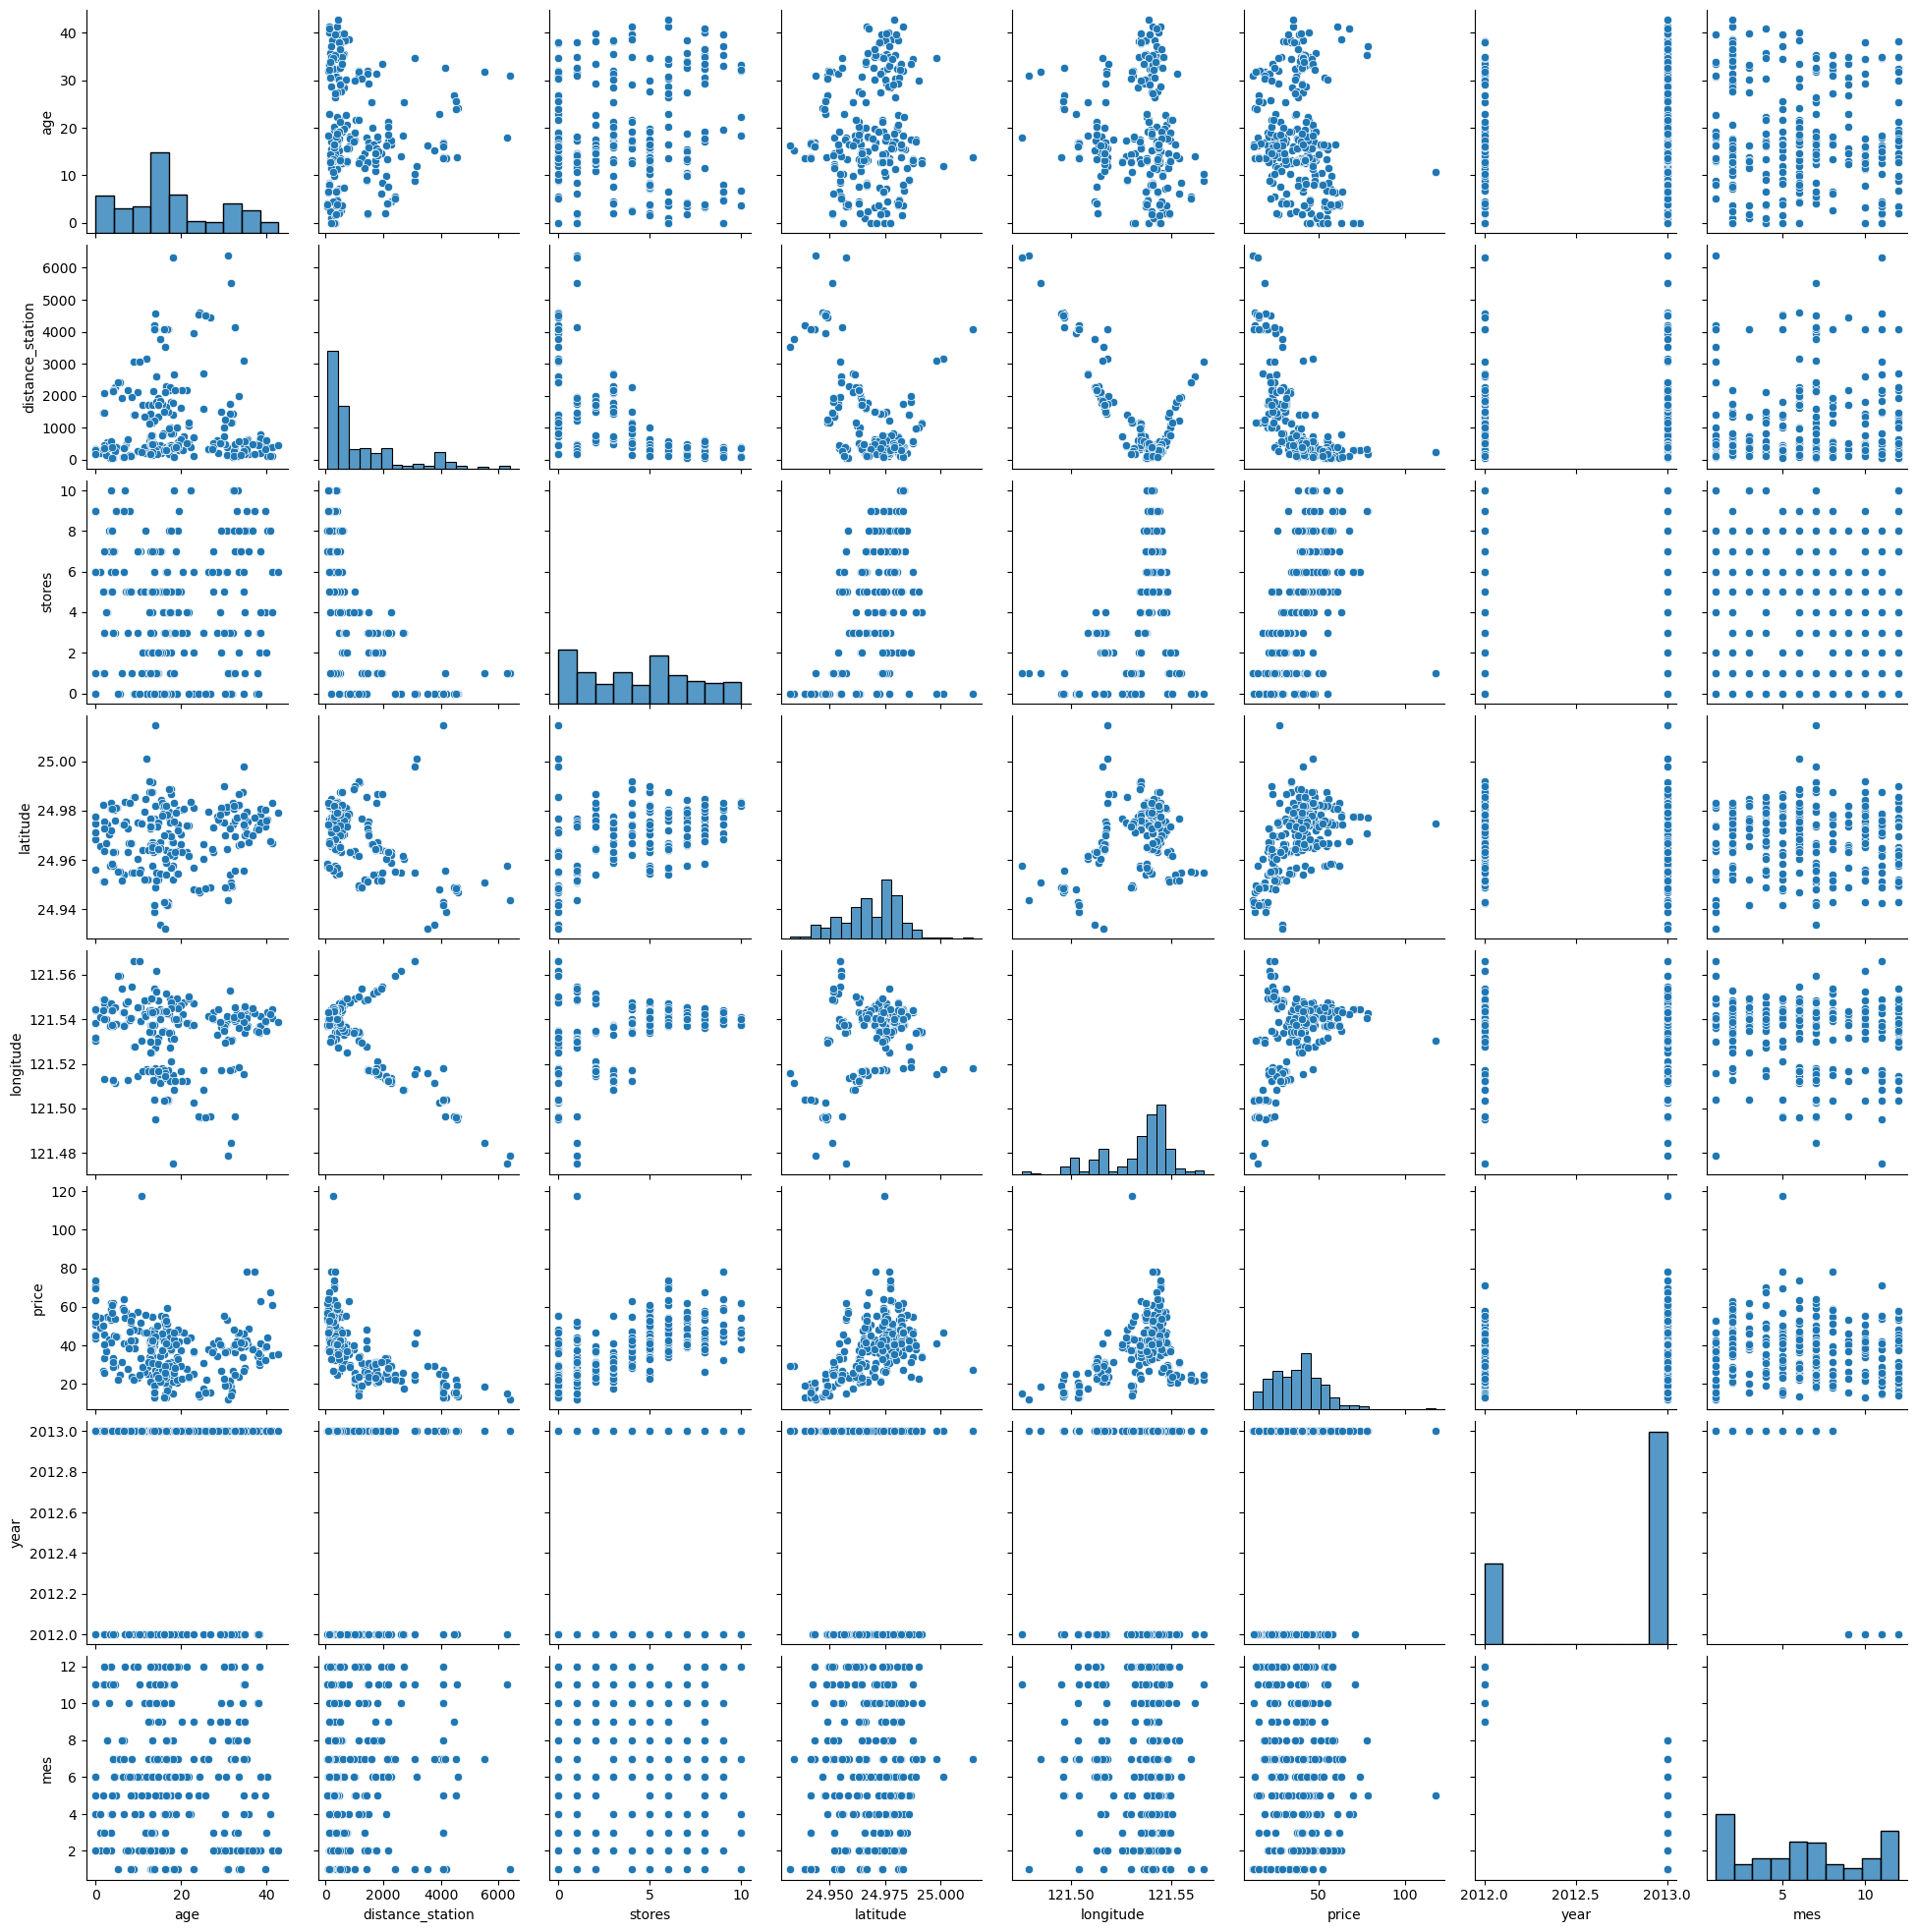

In [68]:
sns.pairplot(num)

### Revisión del Price 

In [69]:
num[num.price >70].sort_values(by='price')

,age,distance_station,stores,latitude,longitude,price,year,mes
10,0.00,293.00,6,24.98,121.54,70.10,2013,4
71,0.00,293.00,6,24.98,121.54,71.00,2012,11
112,0.00,293.00,6,24.98,121.54,73.60,2013,6
220,35.40,318.53,9,24.97,121.54,78.00,2013,8
154,37.20,186.51,9,24.98,121.54,78.30,2013,5
189,10.80,252.58,1,24.97,121.53,117.50,2013,5


### Revisión del Distance_station 

In [70]:
num[num.distance_station > 4605.75].sort_values(by='distance_station')

,age,distance_station,stores,latitude,longitude,price,year,mes
5,31.70,5512.04,1,24.95,121.48,18.80,2013,7
178,18.00,6306.15,1,24.96,121.48,15.00,2012,11
78,30.90,6396.28,1,24.94,121.48,12.20,2013,1


### ELIMINAR VARIABLES ATÍPICAS

Eliminamos el registro atípico de price (target)

In [71]:
num = num.drop(index= num.index[189])

#### Comprobar el mínimo y máximo de las variables

In [72]:
print('price\n',num['price'].describe().loc[['min','max']])
print('\n')
print('distance_station\n',num['distance_station'].describe().loc[['min','max']])

price
 min   12.20
max   78.30
Name: price, dtype: float64


distance_station
 min     49.66
max   6396.28
Name: distance_station, dtype: float64


**Conclusión:**

- Revisando latitude y longitud de las siguientes las 3 viviendas más alejadas no la eliminamos.
- Revisando price eliminamos el registro atípico de 117.50

## VERIFICAR TAMAÑO DE LOS DATOS

In [73]:
print('Numéricas', num.shape[0], 'registros')

Numéricas 289 registros


## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [74]:
ruta_trabajo = '../../02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_num= '../../02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardamos los archivos

In [75]:
df.to_pickle(ruta_trabajo)
num.to_pickle(ruta_num)